# Análise Descritiva (New-York-City-Airbnb-Open-Data)

In [1]:
# vou importar as principais bibliotecas que podem nos ajudar a fazer análise descritiva dos dados
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('new-york-city-airbnb-open-data/AB_NYC_2019.csv')  

#### 1) Quero saber a quantidade de colunas e linhas da minha base

In [3]:
df.shape

(48895, 16)

Obtemos: 16 variáveis(colunas) e 48895 linhas.

#### 2) Quero visualizar melhor meus dados através de um sumário

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


A partir deste sumário podemos verificar os tipos das nossas variáveis(numérica/ categórica) <br>
id = Numérica <br>
name = Categórica <br>
host_id = Numérica <br>
host_name = Categórica <br>
neighbourhood_group = Categórica <br>
neighbourhood = Categórica <br>
latitude = Numérica <br>
longitude = Numérica <br>
room_type = Categórica <br>
price = Numérica <br>
minimum_nights = Numérica <br>
number_of_reviews = Numérica <br>
last_review = Numérica <br>
reviews_per_month = Numérica <br>
calculated_host_listings_count = Numérica <br>
availability_365 = Numérica <br>

#### 3) Antes de começar a relacionar as variáveis entre si, necessitamos verificar se há dados nulos na base

In [5]:
df.isna().any()  # Esta funcão retorna true se houver algum dado nulo por coluna.

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

Todos os valores que retornaram True possuem dados nulos, logo temos que tratar destes dados antes de continuar nossa análise, podemos decidir não utilizar essas colunas que possuem dados nulos, ou podemos por exemplos preencher os valores se forem numéricos com o valor da média/mediana ou moda por exemplo.<br>
Para este caso,vou deletar as variáveis categóricas **name** e **host_name** uma vez que podem ser representados pelos seus ids.<br>
Para last_review e reviews_per_month eu preciso verificar a quantidade de dados nulos

In [6]:
df.isnull().sum() #Verificando a quantidade de dados nulos

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Decisão 1**: Deletando as duas colunas categóricas

In [7]:
df = df.drop(columns=['name', 'host_name'])

**Decisão 2**: para last_review e reviews_per_month vou deletar apenas as linhas com valores nulos

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Obtemos agora nossa base sem dados nulos!!  \o/

In [10]:
df.shape

(38843, 14)

#### 4) Pode-se agora verificar a Descrição da nossa base de dados

In [11]:
df.iloc[:, 2:].describe() # não faz sentido ver o describe das duas primeiras colunas já que são ids

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000
mean,40.728134,-73.951148,142.317947,5.868059,29.297557,1.373221,5.164457,114.882888
std,0.054990,0.046695,196.945624,17.384784,48.186374,1.680442,26.295665,129.543636
min,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,40.688640,-73.982470,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,40.721710,-73.954800,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


##### Através da função describe podemos obter muita informação sobre nossas variáveis numéricas e alguns questionamentos:<br>
**Para a latitude e longitude**: Podemos verificar que as linhas **mean** e **50%** que correspodem a média e mediana respectivamente são bem próximas (amplitude dos dados)- (40.728134-40.721710) e (-73.951148- (-73.954800)), a mediana representa que 50% dos dados foram coletados em lugares de latitude e longitude igual ou menor que 40.721710 e -73.954800 respectivamente. Podemos percerber também que o primeiro quartil (25%) e o terceiro quartil (75%) também não variam muito, o que mostra que a coleta de dados foi feita em uma pequena região do globo (NYC).
<br><br>
**Para o preço**: A média do preço gasto foi de 196.94 dólares e a mediana 101.00 dólares (Podemos calcular a amplitude dos dados -> (196.94 - 101.00 = 95,94), podemos verificar que o menor valor foi 0.0 (alguma promoção? outlayer?) e maior valor foi de 10,000.
<br><br>
**Para o Mínimo de noite**: De média as pessoas ficaram 5.868059 noites, mas 50% das pessoas ficaram 2 noites ou 1 noite. O mínimo de noites foi de 1 e o máximo de noites foi 1250 (A pessoa estava morando no Airbnb? outlayer?)<br><br>
**Para o número de reviews**: Cada Airbnb teve média de 29.297557 reviews, o Airbnb com menor número de review obteve apenas um review, e o Airbnb com maior review obteve 629 reviews. Ainda 50% dos Airbnb tiverem 9 ou menos reviews.<br><br>
**Para o número de reviews mensal**: Cada Airbnb teve média de 1.373221 reviews mensal, o Airbnb com menor número de review mensal obteve apenas 0.010000 review (Pode se considerar zero?), e o Airbnb com maior review mensal obteve 58 reviews no mês. Ainda 50% dos Airbnb tiverem 0.720 ou menos reviews mensal.
<br><br>
**Para o número de listagem do host**: Em média foi listado 5.164457 vezes, no mínimo foi listado uma única vez e no máximo 327 vezes (Outlayer?). A mediana mostra que 50% das listagens foi feita de uma à nenhuma vez.
<br><br>
**Para o número de dias em que a listagem está disponível para reserva**: Em média estava disponível 114.882888 dias, no mínimo estava disponível 0 dias (Outlayer? é possível ser listado sem ter dias disponíveis?), no máximo 365 dias (ano inteiro). A mediana mostra que 50% tinham disponíveis <=55 dias.
<br><br>

#### 5) Vamos agora verificar a dispersão dos dados
Através do Histograma podemos visualizar qual a é distribuição de frequência dos dados

In [12]:
df_id = df['id']
host_id = df['host_id']
price = df['price']
minimum_nights = df['minimum_nights']
number_of_reviews = df['number_of_reviews']
reviews_per_month =df['reviews_per_month']
calculated_host_listings_count = df['calculated_host_listings_count']
availability_365 = df['availability_365']

Text(0, 0.5, 'Frequency')

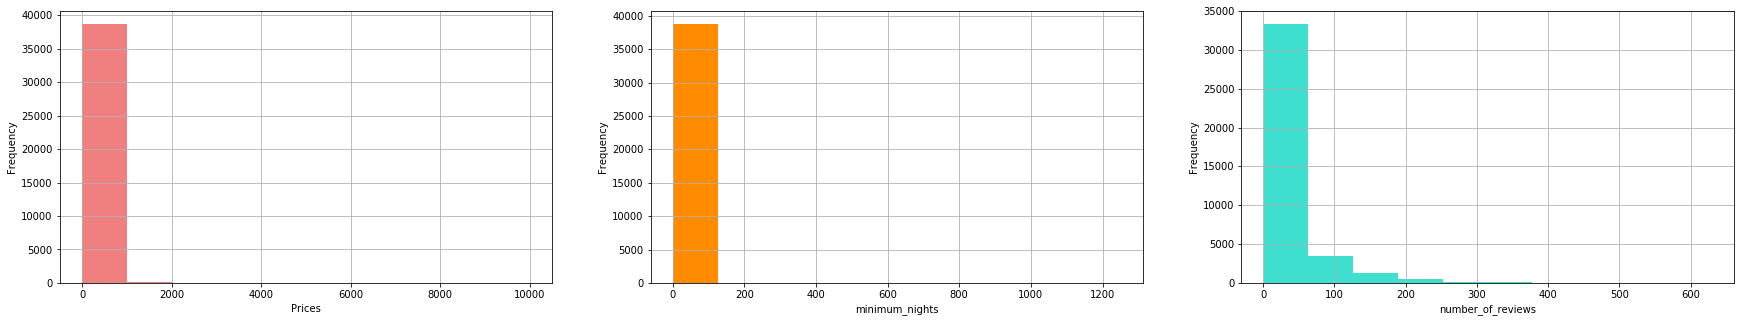

In [13]:
fig, axes = plt.subplots(nrows = 1, ncols = 3,figsize = (30,5))
fig.subplots_adjust(hspace=4)
price.hist(ax=axes[0], color = 'lightcoral')
minimum_nights.hist(ax=axes[1], color = 'darkorange')
number_of_reviews.hist(ax=axes[2], color = 'turquoise')
axes[0].set_title('')
axes[0].set_xlabel('Prices')
axes[0].set_ylabel('Frequency')
axes[1].set_title('')
axes[1].set_xlabel('minimum_nights')
axes[1].set_ylabel('Frequency')
axes[2].set_title('')
axes[2].set_xlabel('number_of_reviews')
axes[2].set_ylabel('Frequency')


Podemos verificar através do histogras a assimetria dos dados: <br>
price: Assimetria a direita <br>
minimum_nights: Assimetria a direita <br>
number_of_reviews: Assimetria a direita <br>

Text(0, 0.5, 'Frequency')

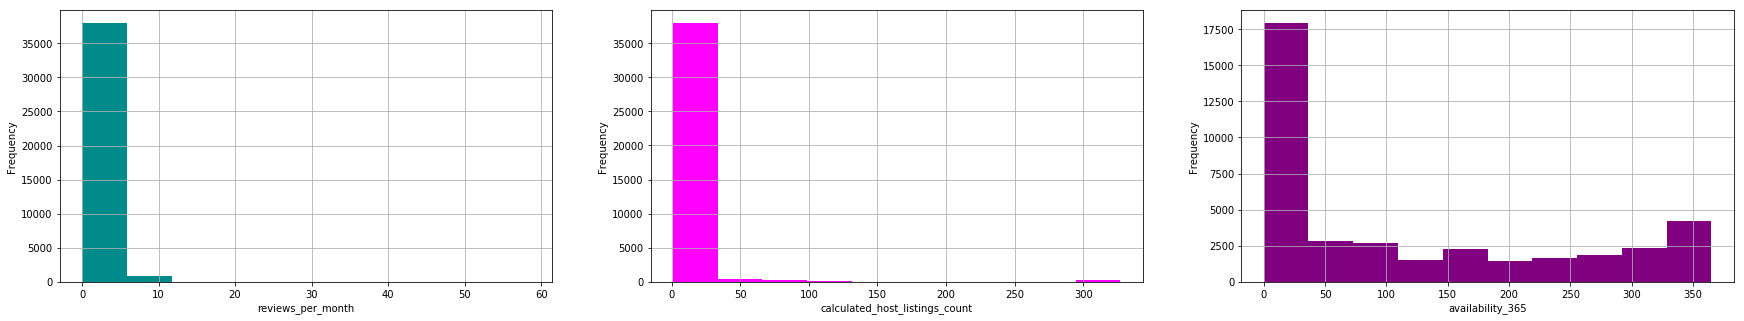

In [14]:
fig, axes = plt.subplots(nrows = 1, ncols = 3,figsize = (30,5))
fig.subplots_adjust(hspace=4)
reviews_per_month.hist(ax=axes[0], color = 'darkcyan')
calculated_host_listings_count.hist(ax=axes[1], color = 'magenta')
availability_365.hist(ax=axes[2], color = 'purple')
axes[0].set_title('')
axes[0].set_xlabel('reviews_per_month')
axes[0].set_ylabel('Frequency')
axes[1].set_title('')
axes[1].set_xlabel('calculated_host_listings_count')
axes[1].set_ylabel('Frequency')
axes[2].set_title('')
axes[2].set_xlabel('availability_365')
axes[2].set_ylabel('Frequency')

reviews_per_month: Assimetria a direita <br>
calculated_host_listings_count: Assimetria a direita <br>
availability_365: Assimetria a direita <br>

#### 6) Vamos Tornar a nossa variável price como nossa variável target e assim achar a relação desta variável com as demais (Média, Mediana e Moda também serão plotadas)

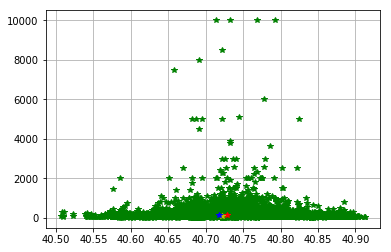

In [15]:
x = df['latitude']
y = price
plt.grid(True)
plt.plot(x, y, 'g*')
plt.plot(np.mean(x),np.mean(y),'*r')
plt.plot(np.median(x),np.median(y), '*y')
plt.plot(x.mode(),y.mode(),'*b')
plt.show()

**Observação**: Podemos perceber que os valores mais caros então entre as latitudes 40.65 e 40.85, e que também é onde se apresentam a maior quantidade de aluguéis de Airbnb.

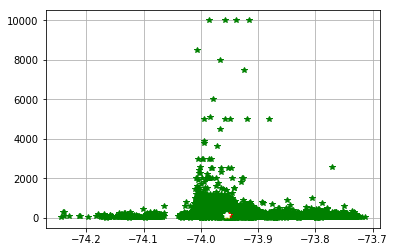

In [16]:
x = df['longitude']
y = price
xmode = x.mode()# x possui duas modas, ambas bem próximas de si.
y.mode()
plt.grid(True)
plt.plot(x, y, 'g*')
plt.plot(np.mean(x),np.mean(y),'*r')
plt.plot(np.median(x),np.median(y), '*y')
plt.plot(xmode[0],y.mode(),'*w') 
plt.plot(xmode[1],y.mode(),'*w') 
plt.show()

**Observação**: Podemos perceber que os valores mais caros então entre as longitudes ~ -74 e ~ -73.9, e que também é onde se apresentam a maior quantidade de aluguéis de Airbnb.

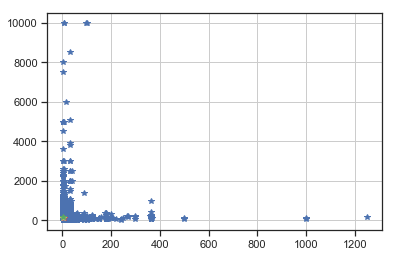

In [68]:
x = minimum_nights
y = price
plt.grid(True)
plt.plot(x,y, 'b*')
plt.plot(np.mean(x),np.mean(y),'*r')
plt.plot(np.median(x),np.median(y), '*y')
plt.plot(x.mode(),y.mode(),'*g')
plt.show()

**Observação**: Podemos perceber poucos casos com diárias maiores de 400 dias, mas que elas foram bem baratas certamente são autlayers. A moda, média e mediana estão sobrepostas e próximas a zero. Pela posição dos dados podemos dizer que a maior quantidade de diária está entre 0 e 100 e que nesse intervalo se apresentam as diárias mais caras.

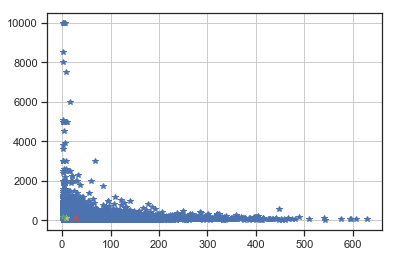

In [46]:
x = number_of_reviews
y = price
plt.grid(True)
plt.plot(x, y, 'b*')
plt.plot(np.mean(x),np.mean(y),'*r')
plt.plot(np.median(x),np.median(y), '*y')
plt.plot(x.mode(),y.mode(),'*g')
plt.show()

**Observação**: Podemos perceber que os Airbnb com valores mais caros foram os que obtiveram menores números de reviews

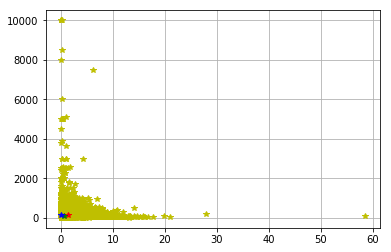

In [19]:
x = reviews_per_month
y = price
plt.grid(True)
plt.plot(x, y, 'y*')
plt.plot(np.mean(x),np.mean(y),'*r')
plt.plot(np.median(x),np.median(y), '*g')
plt.plot(x.mode(),y.mode(),'*b')
plt.show()

**Observação**: Podemos perceber também que os Airbnb com valores mais caros foram os que obtivera menores números de reviews por mês.

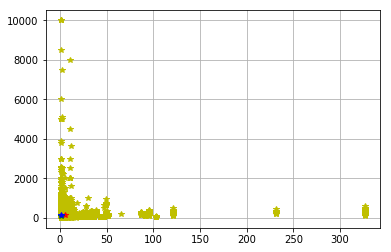

In [20]:
x = calculated_host_listings_count
y = price
plt.grid(True)
plt.plot(x, y, 'y*')
plt.plot(np.mean(x),np.mean(y),'*r')
plt.plot(np.median(x),np.median(y), '*g')
plt.plot(x.mode(),y.mode(),'*b')
plt.show()

**Observação**: Podemos perceber também que os Airbnb com valores mais caros foram poucos listados. Os que foram mais listados foram os mais baratos.

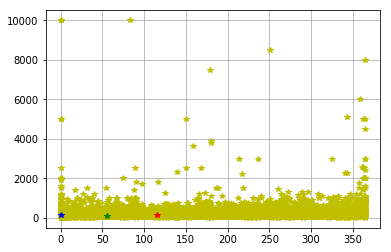

In [21]:
x = availability_365
y = price
plt.grid(True)
plt.plot(x, y, 'y*')
plt.plot(np.mean(x),np.mean(y),'*r')
plt.plot(np.median(x),np.median(y), '*g')
plt.plot(x.mode(),y.mode(),'*b')
plt.show()

**Observação**: Temos Airbnb com preços variados com disponibilidade também variadas, os mais baratos aparentemente são o que tem availability_365>0 e availability_365<=70 (próximo à moda) assim como entre ~ availability_365>250 e availability_365<325.

### **Para os dados categóricos**

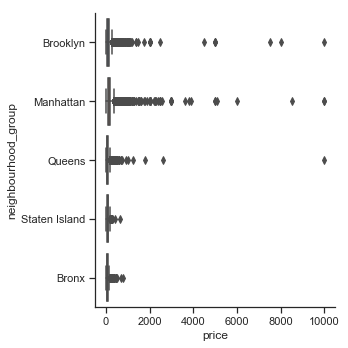

In [22]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="price", y="neighbourhood_group", kind="box", data=df);

**Observação**: Podemos observar muitos outlayers nesse gráfico.Vamos considerar que o preço de 2000 dolares um valor muito alto que eu não quero pagar, então vamos verificar o
neighbourhood_group que possui valores maiores ou iguais a 2500 dolares

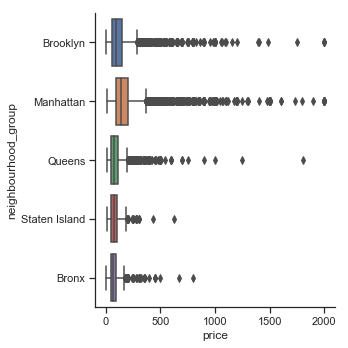

In [77]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="price", y="neighbourhood_group",  kind="box", data=df[df["price"] <=2000]);

Ainda encontramos muito outlayers, vamos vizualizar então as cidades possuem esse valor alto, pois eu gostaria de evitar pagar este valor

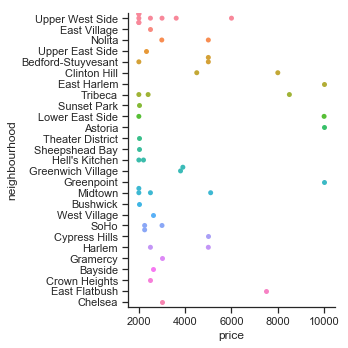

In [80]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="price", y="neighbourhood",  kind="swarm", data=df[df["price"] >= 2000]);

Eu poderia então evitar buscar Airbnb nesses lugares. Penso então em querer pagar algo parecido com a média dos preços por isso vou buscar as cidades que tem preço igual a média do preço.

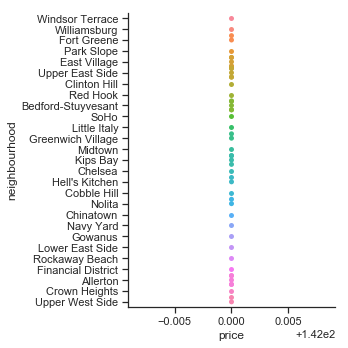

In [82]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="price", y="neighbourhood",  kind="swarm", data=df[df["price"] == 142]);

Posso então fazer a busca entre essas cidades que foram listadas.

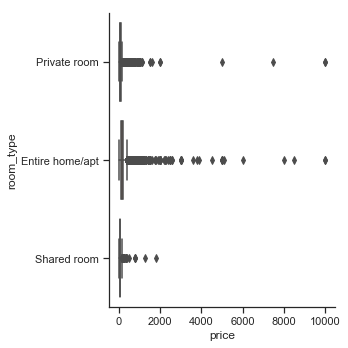

In [28]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="price", y="room_type", kind="box", data=df);

**Observação**: A partir desse gráfico verificamos que o airbnb que disponibiliza private room e Entire home/ap são os mais caros

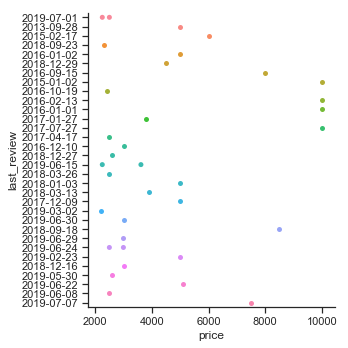

In [84]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="price", y="last_review", kind="swarm", data=df[df["price"] > 2000]);

**Observação**: A partir desse gráfico verificamos os lasts_reviews dos airbnb mais caros aconteceram nos anos de 2013,2015,2016,2017 e 2019